# <center>  World Happiness Report
### Import Data

In [117]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

r15 = pd.read_csv('https://www.dropbox.com/s/we7ee8bkdmykw97/2015.csv?dl=1')
r16 = pd.read_csv('https://www.dropbox.com/s/3tbo0h3zu77bl7e/2016.csv?dl=1')
r17 = pd.read_csv('https://www.dropbox.com/s/tjwljwmksoes95o/2017.csv?dl=1')

r15['Year'] =  '2015'
r16['Year'] =  '2016'
r17['Year'] =  '2017'

reports = [r15, r16, r17]
years = ['2015','2016','2017']

### DataFrame Shape

In [118]:
for r in reports:
    print(r.shape)

(158, 13)
(157, 14)
(155, 13)


Seems like their is an extra feature in one report
### Report Features

In [119]:
r15.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'Year'],
      dtype='object')

In [120]:
r16.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Year'],
      dtype='object')

In [121]:
r17.columns

Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual', 'Year'],
      dtype='object')

The governing body changed there reporting methodology in 2016 and 2017, changing the names of some features  reporting new one.
### View the Two Different Repost

In [122]:
r15.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


In [123]:
r16.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2016
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,2016
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,2016
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,2016


In [124]:
r17.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Year
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,2017
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,2017
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,2017


# <center> Cleaning Data
### Feature Engineering Upper and Lower Confindence Intreval for 2015 Report

In [125]:
r16.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Year'],
      dtype='object')

In [126]:
# creating and upper and lower confidence interval scores
r15['Lower Confidence Interval'] = r15['Happiness Score'] - r15['Standard Error']
r15['Upper Confidence Interval'] = r15['Happiness Score'] + r15['Standard Error']

# sorting the report correctly
r15  = r15[r16.columns]
r15.sample(2)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
137,Mali,Sub-Saharan Africa,138,3.995,3.93898,4.05102,0.26074,1.03526,0.20583,0.38857,0.12352,0.18798,1.79293,2015
52,Paraguay,Latin America and Caribbean,53,5.878,5.83237,5.92363,0.75985,1.30477,0.66098,0.53899,0.08242,0.34240,2.18896,2015


In [127]:
# reorder dataframe column
r15 = r15[r16.columns]
r15

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1,7.587,7.55289,7.62111,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,7.51216,7.60984,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,7.49372,7.56028,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,7.48320,7.56080,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,7.39147,7.46253,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015
5,Finland,Western Europe,6,7.406,7.37460,7.43740,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955,2015
6,Netherlands,Western Europe,7,7.378,7.35001,7.40599,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570,2015
7,Sweden,Western Europe,8,7.364,7.33243,7.39557,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119,2015
8,New Zealand,Australia and New Zealand,9,7.286,7.25229,7.31971,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425,2015
9,Australia,Australia and New Zealand,10,7.284,7.24317,7.32483,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646,2015



### Fixing 2017 Report Region Feature and Naming Schema

In [128]:
# view all the 2017 countries that are not in the 2016 or 2015 report
null_countries = r17[(~r17['Country'].isin(list(r16['Country'].values))) &
                    (~r17['Country'].isin(list(r15['Country'].values)))].Country
null_countries

32    Taiwan Province of China
70     Hong Kong S.A.R., China
Name: Country, dtype: object

In [129]:
# Find the region for China
r16[r16['Country'] == 'China'][['Country','Region']]

,Country,Region
82,China,Eastern Asia


Since the countries without region of unique district of China, will will just use the region "Eastern Asia" as their Region.

In [130]:
# Creating a dictionary of Country and region matches
country_reg16 = pd.Series(r16.Region.values, index=r16.Country.values).to_dict()
country_reg15 = pd.Series(r15.Region.values, index=r15.Country.values).to_dict()

# Create a new region feature in the r17 report, and encoding the country values, with 
r17['Region'] = r17['Country']
r17['Region'] = r17['Region'].replace(country_reg16)
r17['Region'] = r17['Region'].replace(country_reg15)
r17['Region'] = r17['Region'].replace({'Taiwan Province of China':'Eastern Asia','Hong Kong S.A.R., China':'Eastern Asia'})
r17['Region'].value_counts()

Sub-Saharan Africa                 39
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    19
Southeastern Asia                   8
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

In [131]:
# reordering and renaming 17 columns
r17 = r17[['Country', 'Region' ,'Happiness.Rank', 'Happiness.Score', 'Whisker.low','Whisker.high',
       'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom',
       'Trust..Government.Corruption.', 'Generosity' ,'Dystopia.Residual', 'Year']]

r17.columns = r16.columns
r17.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Norway,Western Europe,1,7.537,7.479556,7.594445,1.616463,1.533524,0.796667,0.635423,0.315964,0.362012,2.277027,2017
1,Denmark,Western Europe,2,7.522,7.462272,7.581728,1.482383,1.551122,0.792566,0.626007,0.400770,0.355280,2.313707,2017
2,Iceland,Western Europe,3,7.504,7.385970,7.622030,1.480633,1.610574,0.833552,0.627163,0.153527,0.475540,2.322715,2017
3,Switzerland,Western Europe,4,7.494,7.426227,7.561772,1.564980,1.516912,0.858131,0.620071,0.367007,0.290549,2.276716,2017
4,Finland,Western Europe,5,7.469,7.410458,7.527542,1.443572,1.540247,0.809158,0.617951,0.382612,0.245483,2.430182,2017


### Checking Null Values

In [226]:
# reassigning reports dataframe with new formatted data
reports = [r15, r16, r17]


# checking null values
null_v = pd.DataFrame()
for r, y in zip(reports, years):
    null_v = pd.concat([null_v, pd.DataFrame(r.isnull().sum(), columns=[y])], axis=1)
null_v

,2015,2016,2017
Country,0,0,0
Region,0,0,0
Happiness Rank,0,0,0
Happiness Score,0,0,0
Lower Confidence Interval,0,0,0
Upper Confidence Interval,0,0,0
Economy (GDP per Capita),0,0,0
Family,0,0,0
Health (Life Expectancy),0,0,0
Freedom,0,0,0


# <center>  Exploratory Analysis
### Number of  Regions

In [133]:
regions = pd.DataFrame()
for r in reports:
    regions = pd.concat([regions, pd.DataFrame(r['Region'].value_counts())], axis=1)
regions

,Region,Region,Region
Sub-Saharan Africa,40,38,39
Central and Eastern Europe,29,29,29
Latin America and Caribbean,22,24,22
Western Europe,21,21,21
Middle East and Northern Africa,20,19,19
Southeastern Asia,9,9,8
Southern Asia,7,7,7
Eastern Asia,6,6,6
North America,2,2,2
Australia and New Zealand,2,2,2


It look the like the countries have been binned into the same amount of regions for each year.
### Number of Countries

In [134]:
for r, y in zip(reports, years):
    print('Unique Countries in', y,'Report:' ,r['Country'].nunique())

Unique Countries in 2015 Report: 158
Unique Countries in 2016 Report: 157
Unique Countries in 2017 Report: 155


Seems like all the same countries where measured.

### Averages Over Time

In [136]:
overview = pd.DataFrame()
for r, y in zip(reports, years):
    overview = pd.concat([overview, pd.DataFrame(r[qntf].mean(), columns=[y])], axis=1)
overview = overview.drop(['Year'], axis=0)
overview

,2015,2016,2017
Happiness Score,5.375734,5.382185,5.354019
Lower Confidence Interval,5.327849,5.282395,5.255713
Upper Confidence Interval,5.423619,5.481975,5.452326
Economy (GDP per Capita),0.846137,0.953880,0.984718
Family,0.991046,0.793621,1.188898
Health (Life Expectancy),0.630259,0.557619,0.551341
Freedom,0.428615,0.370994,0.408786
Trust (Government Corruption),0.143422,0.137624,0.123120
Generosity,0.237296,0.242635,0.246883
Dystopia Residual,2.098977,2.325807,1.850238


GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country. 

### Overall Happiness of the Year

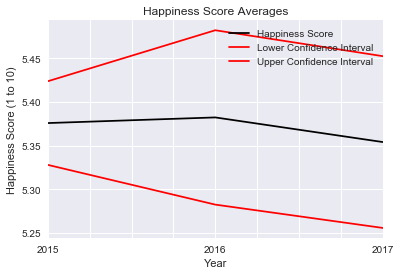

In [137]:
overview[:3].T.plot(color=['black','r','r'])
plt.title('Happiness Score Averages')
plt.ylabel('Happiness Score (1 to 10)') ; plt.xlabel('Year')


In [138]:
r17[['Happiness Score','Lower Confidence Interval']].mean()

Happiness Score              5.354019
Lower Confidence Interval    5.255713
dtype: float64

### Happiness Rankings by Region

In [154]:
region_happiness = pd.DataFrame()
for r, y in zip(reports, years):
    region_happiness_data = pd.DataFrame(r.groupby(['Region'])['Happiness Score'].mean())
    region_happiness_data.columns = [y + ' Happiness Score']
    region_happiness = pd.concat([region_happiness, region_happiness_data], axis=1)
    
# Adding an average happiness Score over the years, and sorting df by average
region_happiness['Average'] = region_happiness[['2015 Happiness Score','2016 Happiness Score',
                                                '2017 Happiness Score']].mean(axis=1)
region_happiness.sort_values(['Average'], ascending=False)

,2015 Happiness Score,2016 Happiness Score,2017 Happiness Score,Average
Region,,,,
Australia and New Zealand,7.285000,7.323500,7.299000,7.302500
North America,7.273000,7.254000,7.154500,7.227167
Western Europe,6.689619,6.685667,6.703714,6.693000
Latin America and Caribbean,6.144682,6.101750,5.957818,6.068083
Eastern Asia,5.626167,5.624167,5.646667,5.632333
Middle East and Northern Africa,5.406900,5.386053,5.369684,5.387546
Central and Eastern Europe,5.332931,5.370690,5.409931,5.371184
Southeastern Asia,5.317444,5.338889,5.444875,5.367069
Southern Asia,4.580857,4.563286,4.628429,4.590857


### Happiness Rankings by Country

In [155]:
country_happiness = pd.DataFrame()
for r, y in zip(reports, years):
    country_happiness_data = pd.DataFrame(r.groupby(['Country'])['Happiness Score'].mean())
    country_happiness_data.columns = [y + ' Happiness Score']
    country_happiness = pd.concat([country_happiness, country_happiness_data], axis=1)
    
# Adding an average happiness Score over the years, and sorting df by average
country_happiness['Average'] = country_happiness[['2015 Happiness Score','2016 Happiness Score',
                                                '2017 Happiness Score']].mean(axis=1)
country_happiness.sort_values(['Average'], ascending=False)

,2015 Happiness Score,2016 Happiness Score,2017 Happiness Score,Average
Switzerland,7.587,7.509,7.494,7.530000
Denmark,7.527,7.526,7.522,7.525000
Iceland,7.561,7.501,7.504,7.522000
Norway,7.522,7.498,7.537,7.519000
Finland,7.406,7.413,7.469,7.429333
Canada,7.427,7.404,7.316,7.382333
Netherlands,7.378,7.339,7.377,7.364667
Sweden,7.364,7.291,7.284,7.313000
New Zealand,7.286,7.334,7.314,7.311333
Australia,7.284,7.313,7.284,7.293667


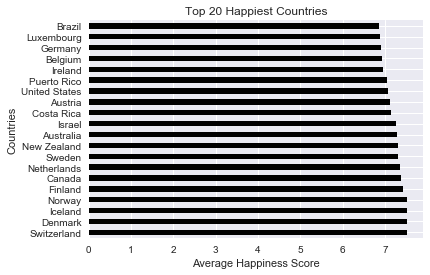

In [167]:
country_happiness.sort_values(['Average'], ascending=False)['Average'][:20].plot.barh(color='black')
plt.title('Top 20 Happiest Countries')
plt.xlabel('Average Happiness Score'); plt.ylabel('Countries')

### Survey Measure vs Happiness Score Correlation Matrix

In [218]:
corr_feat = ['Happiness Score','Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Year']

r17[corr_feat].corr()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Score,1.000000,0.812469,0.752737,0.781951,0.570137,0.429080,0.155256,0.475355
Economy (GDP per Capita),0.812469,1.000000,0.688296,0.843077,0.369873,0.350944,-0.019011,0.024226
Family,0.752737,0.688296,1.000000,0.612080,0.424966,0.231841,0.051693,0.070506
Health (Life Expectancy),0.781951,0.843077,0.612080,1.000000,0.349827,0.279752,0.063191,0.054963
Freedom,0.570137,0.369873,0.424966,0.349827,1.000000,0.499183,0.316083,0.081926
Trust (Government Corruption),0.429080,0.350944,0.231841,0.279752,0.499183,1.000000,0.294159,-0.022755
Generosity,0.155256,-0.019011,0.051693,0.063191,0.316083,0.294159,1.000000,-0.116627
Dystopia Residual,0.475355,0.024226,0.070506,0.054963,0.081926,-0.022755,-0.116627,1.000000


In [227]:
r16[corr_feat].corr()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Score,1.000000,0.790322,0.739252,0.765384,0.566827,0.402032,0.156848,0.543738
Economy (GDP per Capita),0.790322,1.000000,0.669540,0.837067,0.362283,0.294185,-0.025531,0.068624
Family,0.739252,0.669540,1.000000,0.588377,0.450208,0.213561,0.089629,0.119672
Health (Life Expectancy),0.765384,0.837067,0.588377,1.000000,0.341199,0.249583,0.075987,0.100857
Freedom,0.566827,0.362283,0.450208,0.341199,1.000000,0.502054,0.361751,0.091631
Trust (Government Corruption),0.402032,0.294185,0.213561,0.249583,0.502054,1.000000,0.305930,-0.002909
Generosity,0.156848,-0.025531,0.089629,0.075987,0.361751,0.305930,1.000000,-0.133001
Dystopia Residual,0.543738,0.068624,0.119672,0.100857,0.091631,-0.002909,-0.133001,1.000000


In [228]:
r15[corr_feat].corr()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Score,1.000000,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Economy (GDP per Capita),0.780966,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,0.740605,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),0.724200,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.568211,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.395199,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,0.180319,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,0.530474,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


Author: Kavi Sekhon